# June 24, 2019 Reinforcement Learning Q-net
* name : Jikhan Jeong
* reference: https://hunkim.github.io/ml/
* paper: Playing Atari with Deep Reinforcement Learning, V Mnih et al.
* paper referece: https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf
* the performance of Q-network is less than Q-learning and Too slow(= mini batch may a way to speed up)

In [38]:
import numpy as np

In [39]:
np.identity(16) # identity matrix

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [40]:
print(np.identity(16)[0:1])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [41]:
np.eye(16)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [42]:
print(np.eye(16)[10:11])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [43]:
def one_hot(x):
    return np.identity(16)[x:x+1] # x th row

In [3]:
from PIL import Image
import numpy as np
import os

In [6]:
pwd

'C:\\Users\\정직한\\2019_Reinforcement Learning'

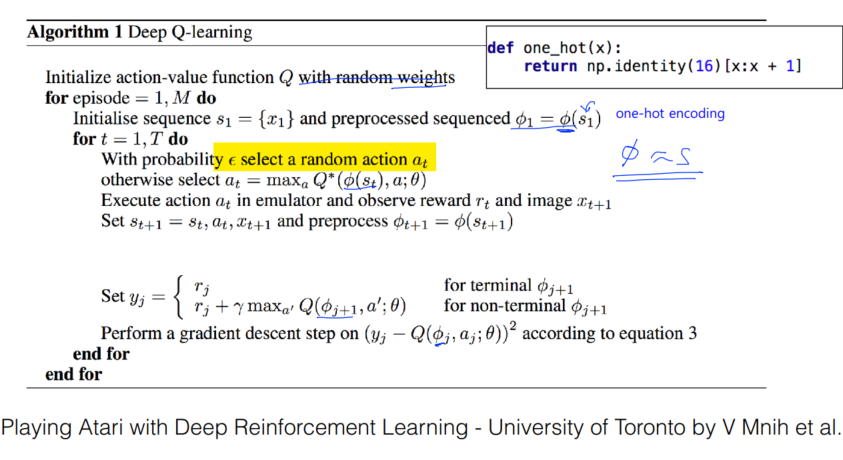

In [11]:
image_path ='q_network1.png'
image = Image.open(image_path) # size = (843, 460)
image

# 1. Network and Set UP

In [44]:
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr
import sympy

* Stocastic 4 x 4 grid world = Frozen Lake Environment in Open Gym

In [45]:
register(
    id='FrozenLake-v4',
    entry_point ='gym.envs.toy_text:FrozenLakeEnv',
    kwargs ={'map_name':'4x4',
            'is_slippery':True}  # is slippery True = Stocastic, Falue = Deterministic
)

In [46]:
env = gym.make('FrozenLake-v4')

C:\python\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [47]:
# Input and Output Size in this given Open Gym environment
input_size = env.observation_space.n # 16
output_size = env.action_space.n # 4
learning_rate = 0.1

In [48]:
# the feed-forward part of the network used to choose actions

X = tf.placeholder(shape=[1, input_size], dtype = tf.float32)        # state input
W = tf.Variable(tf.random_uniform([input_size, output_size],0,0.01)) # weight

Qpred = tf.matmul(X, W)    # out Q prediction = WX
Y = tf.placeholder(shape=[1, output_size], dtype =tf.float32)

loss = tf.reduce_sum(tf.square(Y - Qpred)) # Cost function
train = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

# Set Q-learning related parameters

dis = .99
num_episodes = 2000

# lists to contain total rewards and steps per iteration 
rList = []

# 2. Training

In [49]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init) 
    
    for i in range(num_episodes):

        # Reset environment and get first new observation
        
        s = env.reset()
        e = 1. /((i/50) + 10)
        rALL = 0
        done = False
        local_loss = []
        
        # The Q-Network traning
        
        while not done:
            # Choose an action by greedy from Q net
            
            Qs = sess.run(Qpred, feed_dict ={X: one_hot(s)})
            
            if np.random.rand(1) < e:
                a = env.action_space.sample()
                
            else: 
                a = np.argmax(Qs)
                
            # Get new state and reward from environment
            
            s1, reward, done, _ = env.step(a)
            
            if done:
                # Update Q, and Qs+1, since it's a terminal (=arrive the goal)
                Qs[0, a] = reward # 0 is for 2D array
                
            else: 
                # Obtain the Q_s1 values by feeding the new state through the above network
                
                Qs1 = sess.run(Qpred, feed_dict ={X: one_hot(s1)})
                
                Qs[0, a] = reward + dis*np.max(Qs1)
                
            # Train our network using target (Y) and predicted Q(Qpred) values
            
            sess.run(train, feed_dict = {X: one_hot(s), Y: Qs})
            
            rALL += reward
            
            s= s1
            
        rList.append(rALL)

# 3. Result

Percent of successful episodes:0.5305%


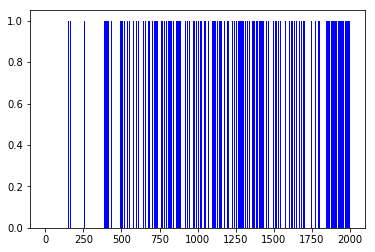

In [50]:
print("Percent of successful episodes:" + str(sum(rList)/num_episodes) + "%")
plt.bar(range(len(rList)), rList, color ="blue")
plt.show()